In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
!unzip "/content/drive/MyDrive/GENAI/Week3/Day4/Apple Stock Prices From 1981 to 2023.zip"

Archive:  /content/drive/MyDrive/GENAI/Week3/Day4/Apple Stock Prices From 1981 to 2023.zip
replace Apple Stock Prices (1981 to 2023).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Apple Stock Prices (1981 to 2023).csv  


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Étape 1 : Exploration et Premier Diagnostic**

In [102]:
file = pd.read_csv('/content/Apple Stock Prices (1981 to 2023).csv')
df = pd.DataFrame(file)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [103]:
df.drop_duplicates(inplace=True)

In [104]:
df.shape

(10608, 7)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


In [106]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


In [107]:
df.isna().mean() * 100

,0
Date,0.0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0


There isn't nan values

In [108]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

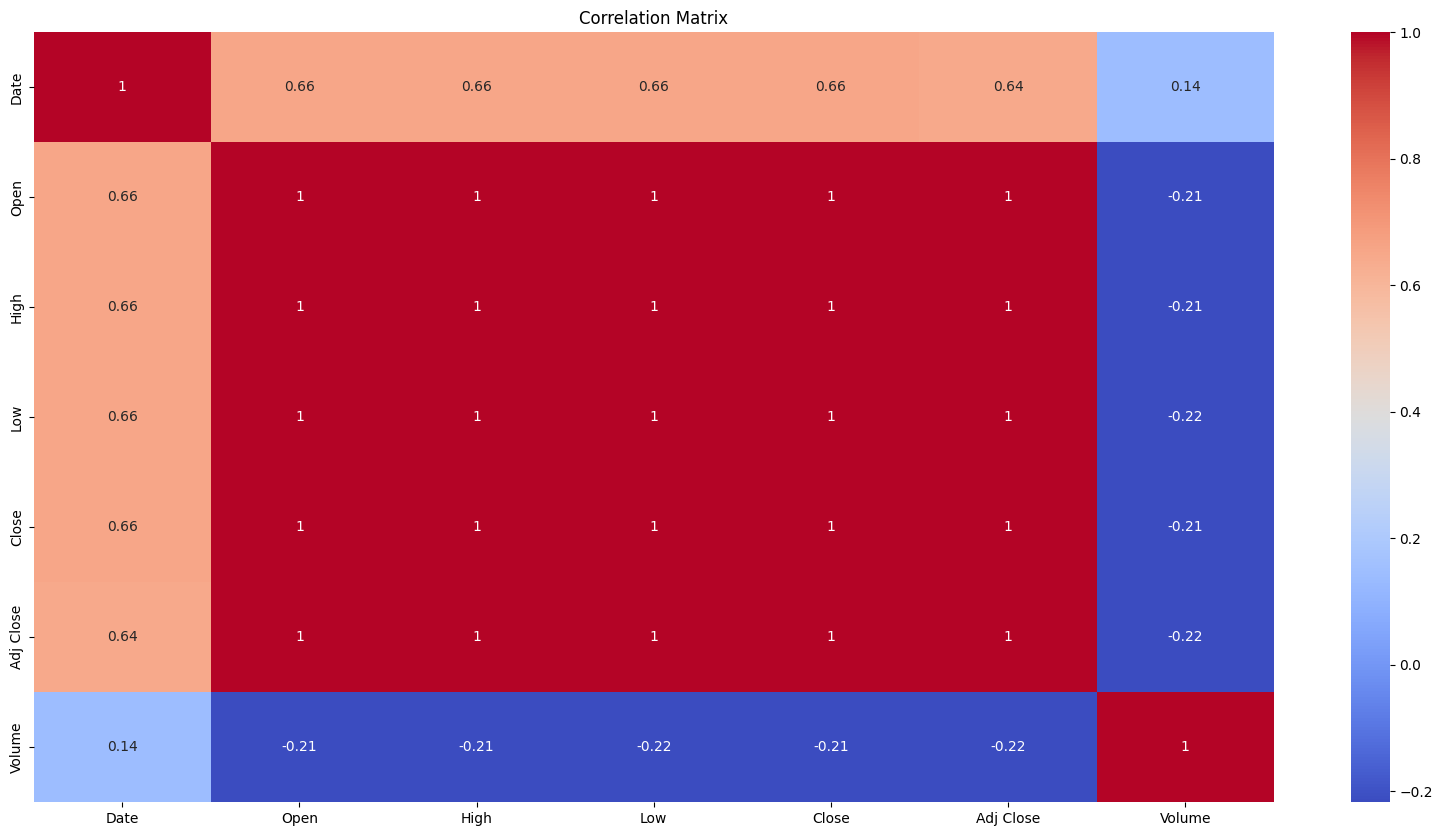

In [109]:
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

As expected, we observe a strong correlation between the prices, while the trading volume does not appear to have a significant influence on price movements.

# **Étape 2 : Nettoyage et Préparation des Données**

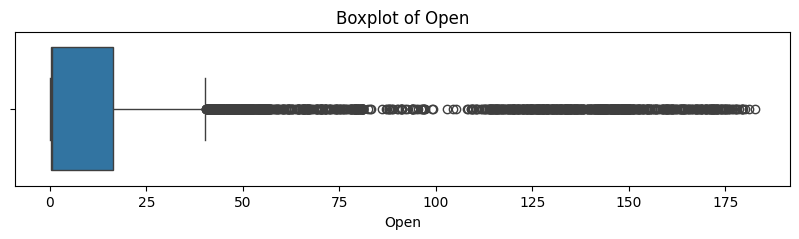

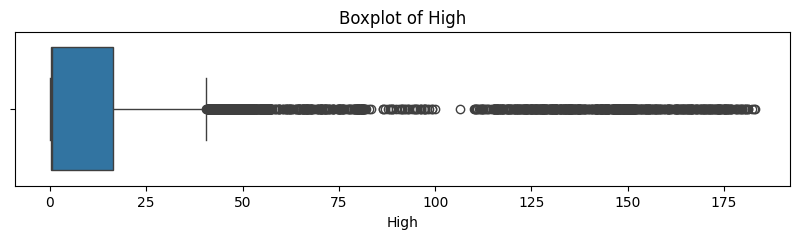

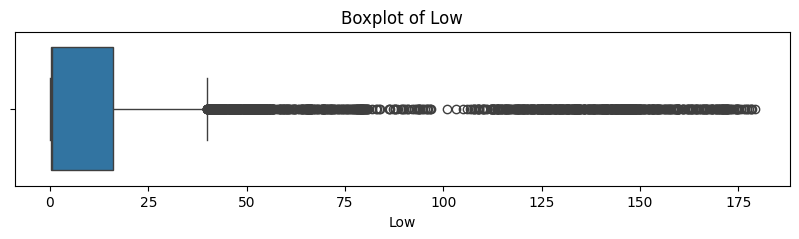

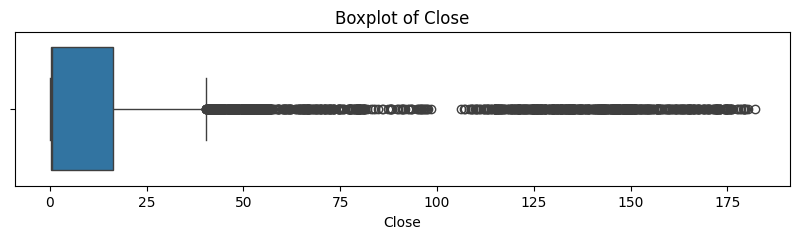

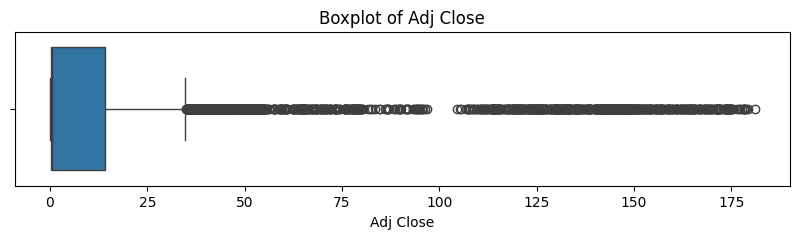

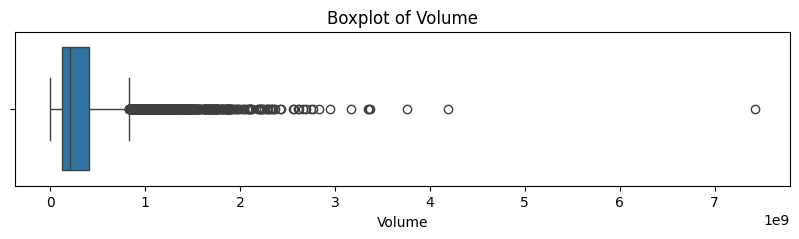

In [110]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [111]:
for col in df.select_dtypes(include='number').columns:
    df[col] = np.log1p(df[col])

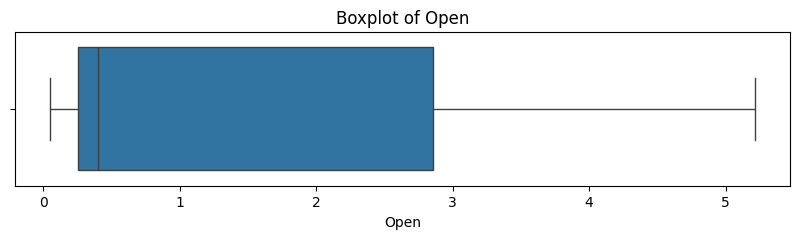

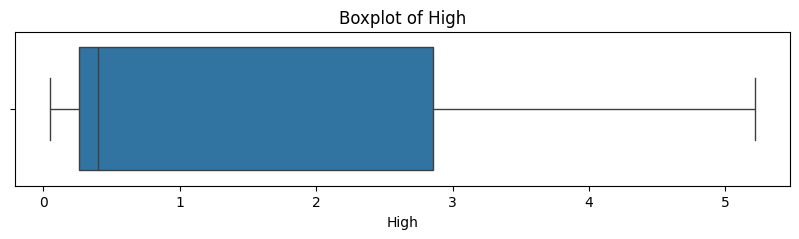

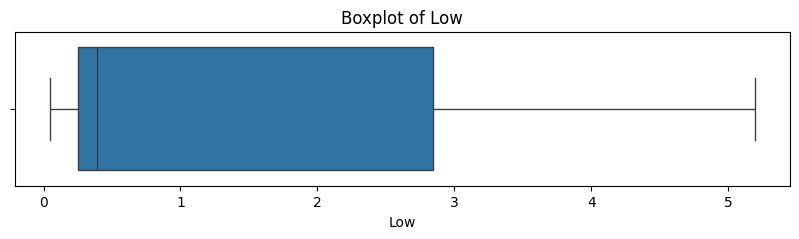

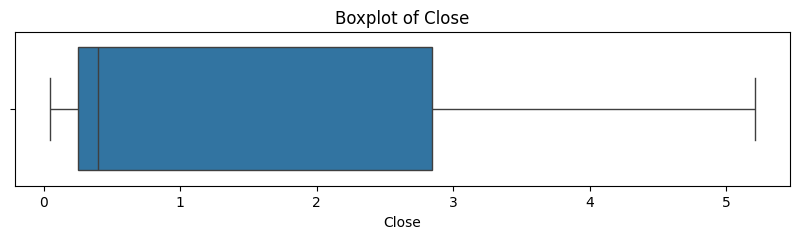

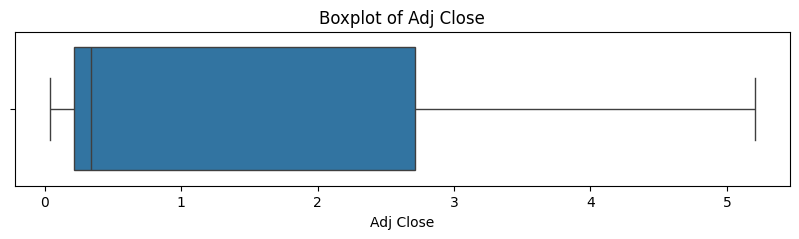

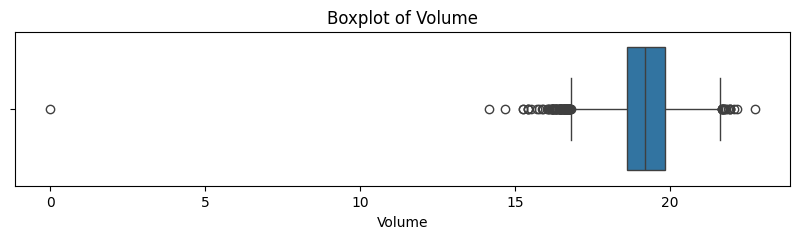

In [112]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [113]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Volume'] >= Q1 - 1.5 * IQR) & (df['Volume'] <= Q3 + 1.5 * IQR)]

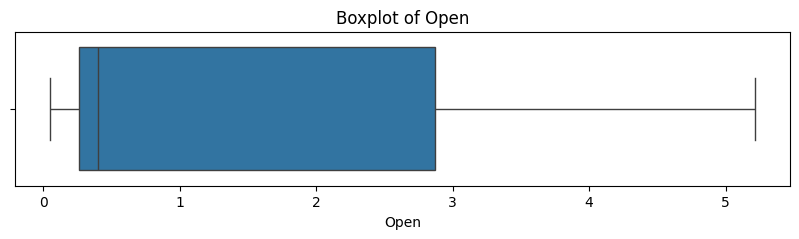

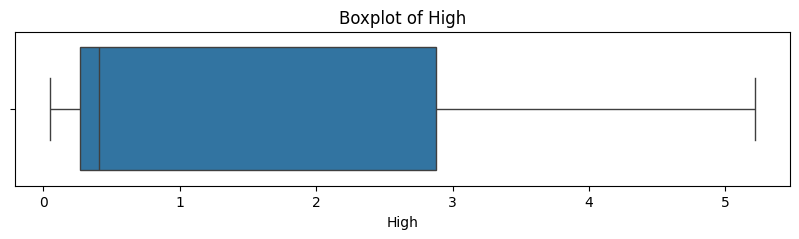

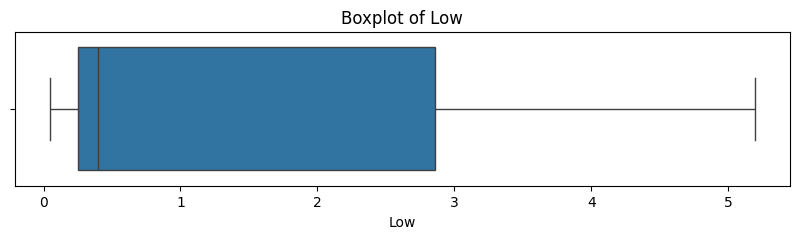

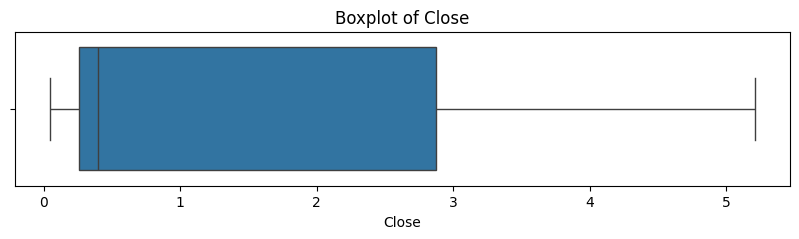

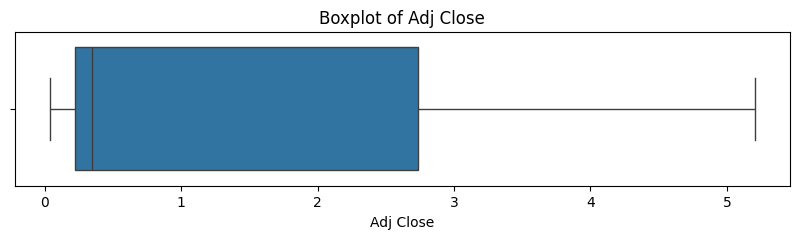

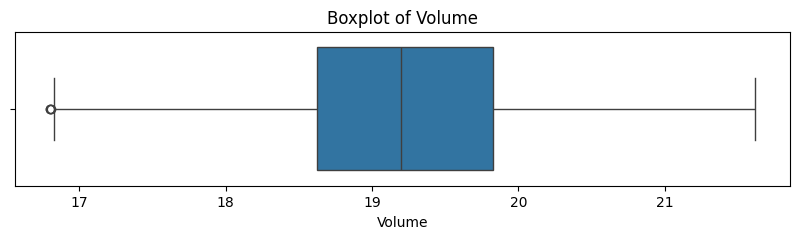

In [114]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# **Étape 3 : Investigation d'un Comportement Complexe**

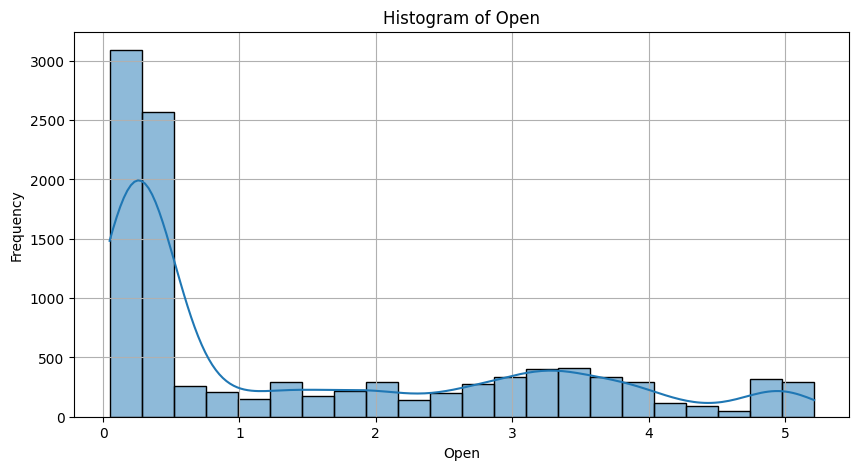

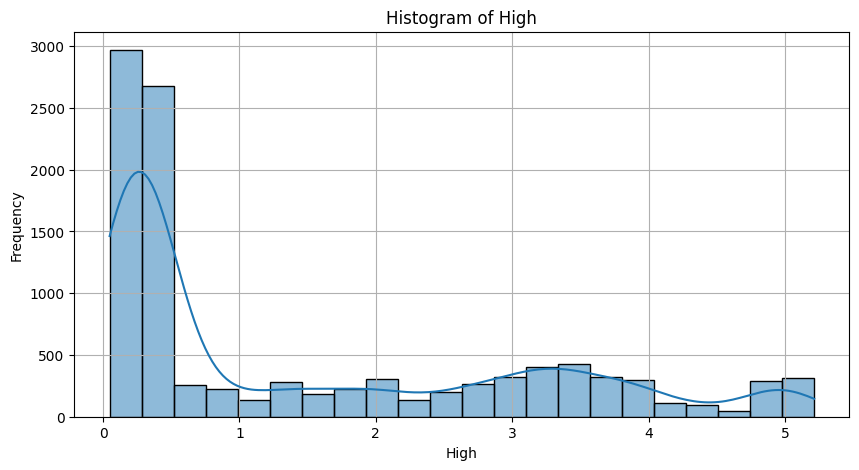

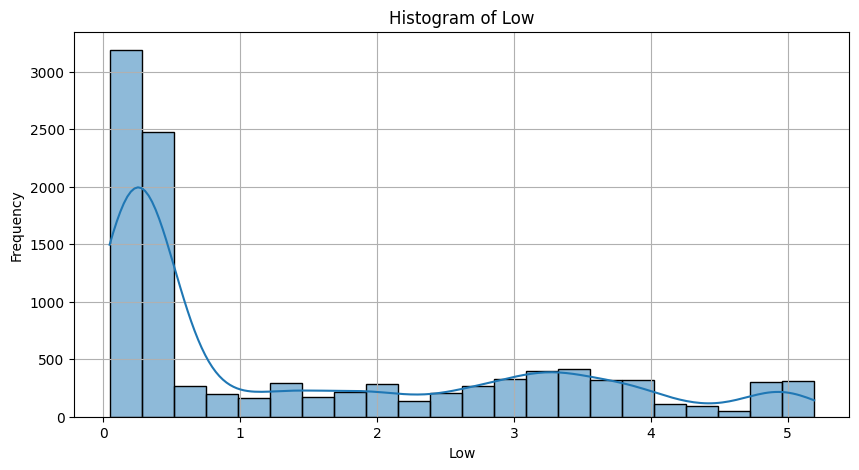

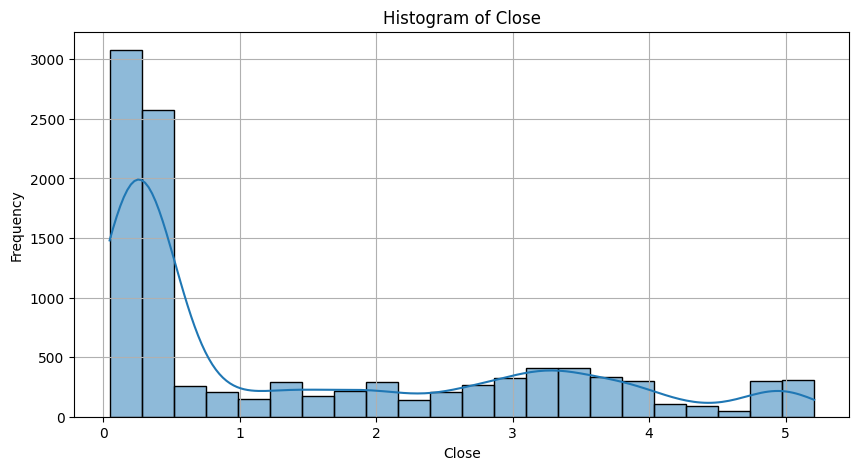

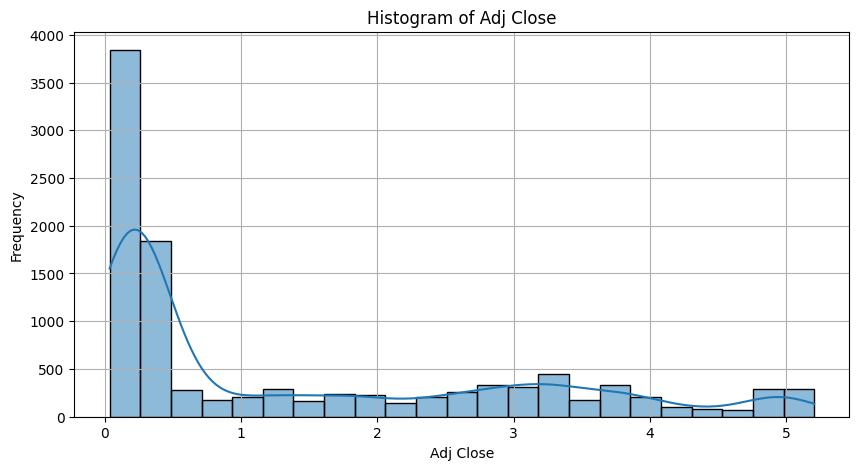

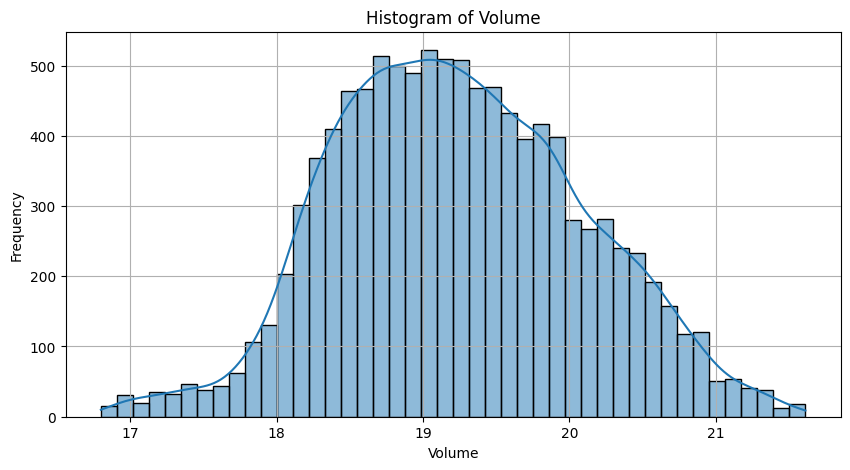

In [115]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col], kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

In [116]:
df["Decade"] = df["Date"].dt.year // 10 * 10

/tmp/ipython-input-117-1237378707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Decade', y='Volume', palette='Set2')


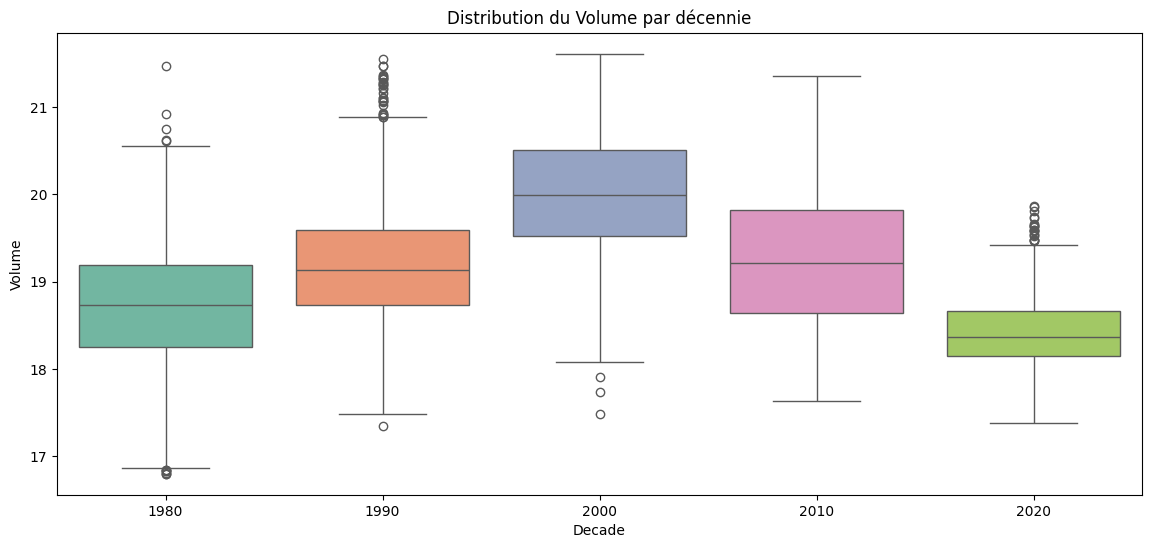

In [117]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Decade', y='Volume', palette='Set2')
plt.title("Distribution du Volume par décennie")
plt.xlabel("Decade")
plt.ylabel("Volume")
plt.show()

We observe a significant variation in trading volume across decades, with a particularly notable increase during the 2000s.

In [118]:
from scipy.stats import f_oneway

groups = [group["Volume"] for _, group in df.groupby("Decade") if len(group) > 1]

f_statistic, p_value = f_oneway(*groups)

if p_value < 0.05:
    print("There is a significant difference in trading volume between decades.")
else:
    print("There is no significant difference in trading volume between decades.")

There is a significant difference in trading volume between decades.


In [119]:
def scaling(group):
  min_group = group["Volume"].min()
  max_group = group["Volume"].max()
  group["Volume"] = (group["Volume"] - min_group) / (max_group - min_group)
  return group

df = df.groupby("Decade").apply(scaling)

/tmp/ipython-input-119-2556863666.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("Decade").apply(scaling)


# **Étape 4 : Construction du Jeu de Données Final**

In [120]:
df_final = df.drop(columns=["Decade"])

In [121]:
df_final.reset_index(drop=True, inplace=True)

In [122]:
df_final.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.143250,0.144216,0.143250,0.143250,0.113194,0.019426
1,1981-01-05,0.140829,0.140829,0.140344,0.140344,0.110865,0.126403
2,1981-01-06,0.134995,0.134995,0.134507,0.134507,0.106189,0.176477
3,1981-01-07,0.129618,0.129618,0.129127,0.129127,0.101885,0.221275
4,1981-01-08,0.127164,0.127164,0.126672,0.126672,0.099922,0.149622


# **Étape 5 : Analyse Approfondie pour Extraire des Conclusions**

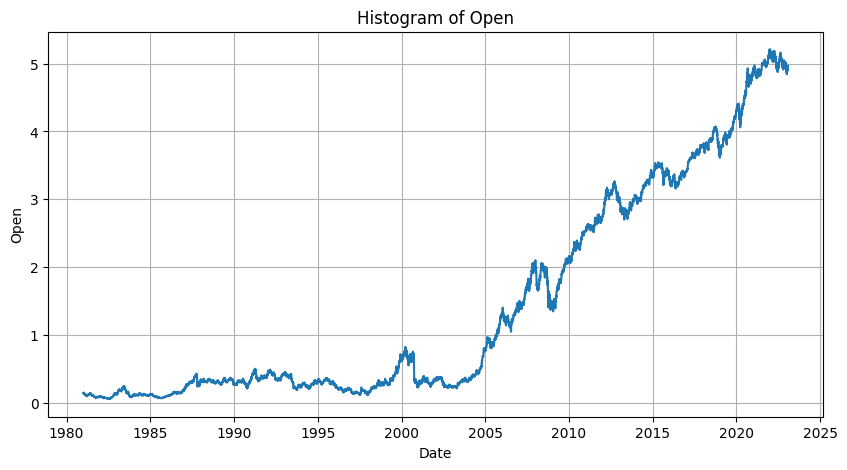

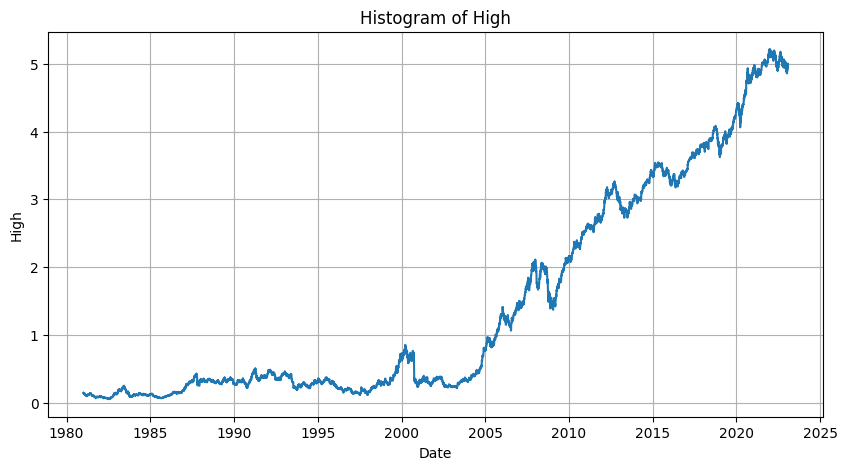

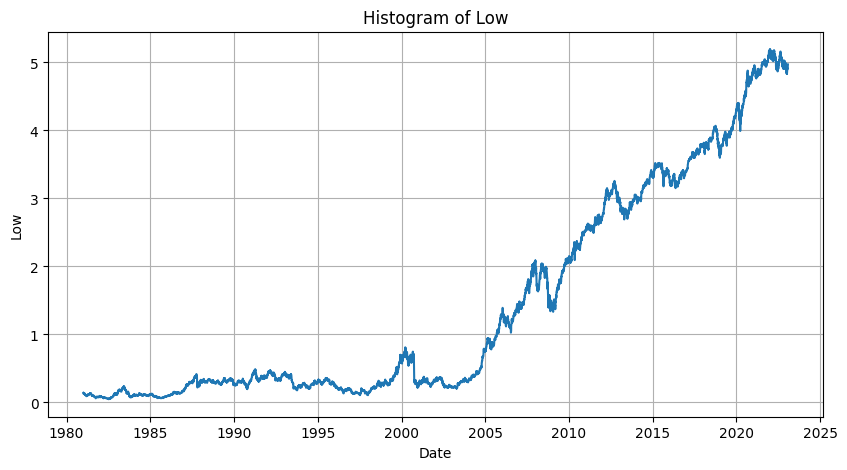

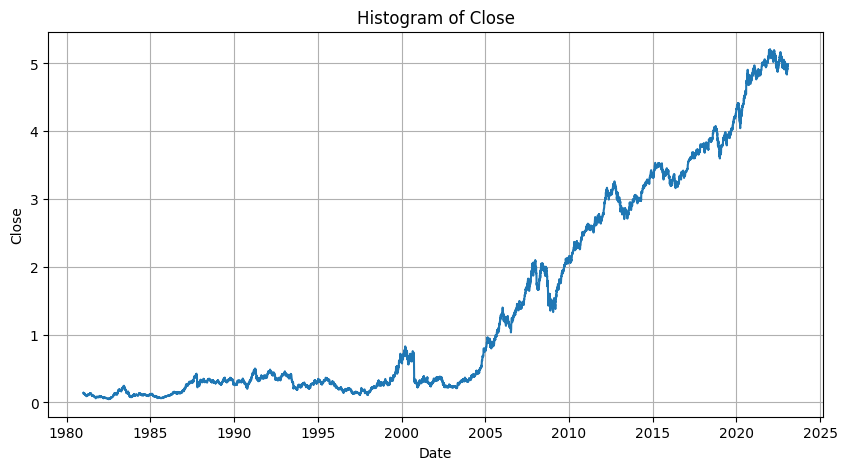

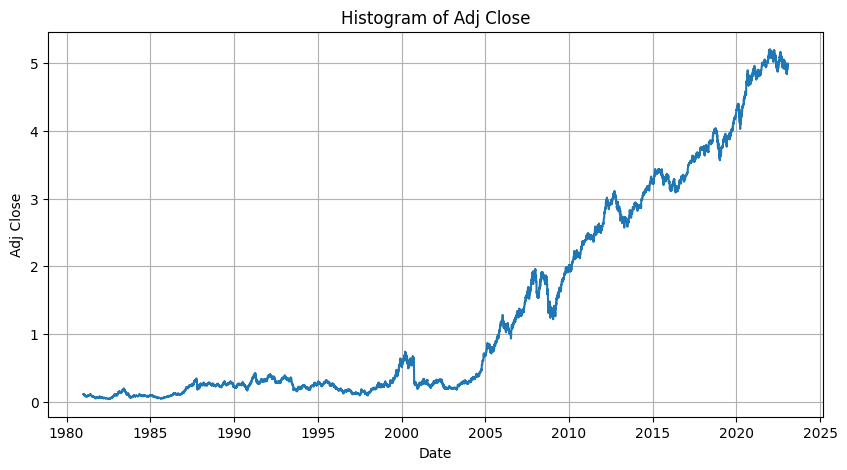

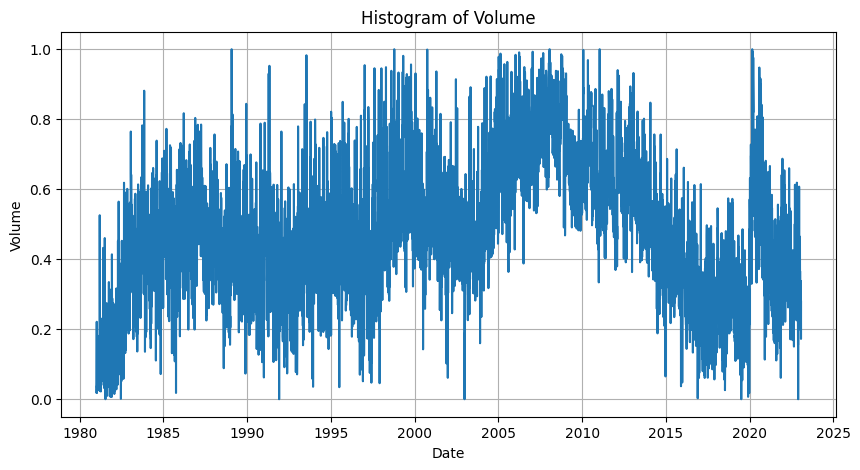

In [123]:
for col in df_final.columns[1:] :
  plt.figure(figsize=(10,5))
  plt.plot(df_final["Date"], df_final[col])
  plt.title(f'Histogram of {col}')
  plt.xlabel("Date")
  plt.ylabel(col)
  plt.grid(True)
  plt.show()

In [125]:
from scipy.stats import ttest_ind

df_final['Année'] = df_final['Date'].dt.year

apres_2010 = df_final[(df_final['Année'] <= 2025) & (df_final['Année'] > 2010)]['Volume']
avant_2000 =df_final[(df_final['Année'] < 2000) & (df_final['Année'] >= 1980)]['Volume']

t_stat, p_value = ttest_ind(apres_2010, avant_2000, equal_var=False)


if p_value < 0.05:
    print("✅ Différence significative entre les deux périodes")
else:
    print("❌ Aucune différence significative détectée")

✅ Différence significative entre les deux périodes
